In [1]:
from __future__ import print_function

from keras.datasets import mnist
from keras.models import Sequential

from keras.models import model_from_json
from keras import backend as K
import matplotlib.pyplot as plt
import json

import os
os.chdir('C:/Users/Kimsarah/Desktop/SK_ML/code')

batch_size = 128
nb_classes = 10
nb_epoch = 20
img_rows, img_cols = 28, 28

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


10000 test samples


In [2]:

# Reconstruct model
model = model_from_json(open('mnist_model_architecture.json').read())
model.load_weights('mnist_model_weights.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 3)         228       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 3)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 3)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
__________

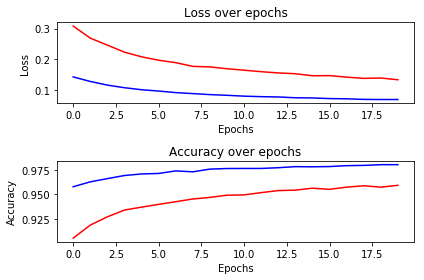

In [3]:

# Plot history
hist = json.loads(open('mnist_model_history.json').read())

plt.figure('history')
plt.subplot(211)
plt.title('Loss over epochs')
plt.plot(hist['loss'],'r',label='loss')
plt.plot(hist['val_loss'], 'b',label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(212)
plt.title('Accuracy over epochs')
plt.plot(hist['acc'],'r',label='acc')
plt.plot(hist['val_acc'], 'b',label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [4]:
# Get output of each layer
get_1st_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[0].output])
get_2nd_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[2].output])
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[7].output])
get_last_layer_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[10].output])
print('X_test image shape:', X_test.shape)
layer_1_output = get_1st_layer_output([X_test,0])[0]
print('Print 1st layer output', layer_1_output.shape)
layer_2_output = get_2nd_layer_output([X_test,0])[0]
print('Print 2nd layer output', layer_2_output.shape)
layer_3_output = get_3rd_layer_output([X_test,0])[0]
print('Print 3rd layer output', layer_3_output.shape)
layer_last_output = get_last_layer_output([X_test,0])[0]
print('Print last layer output', layer_last_output.shape)


X_test image shape: (10000, 28, 28, 1)
Print 1st layer output (10000, 24, 24, 3)
Print 2nd layer output (10000, 20, 20, 3)
Print 3rd layer output (10000, 128)
Print last layer output (10000, 10)


In [5]:
# Predict classes and probability
print('Predict classes')
classes = model.predict_classes(X_test, batch_size)
print('Predict probability')
proba = model.predict_proba(X_test, batch_size)

Predict classes
 9856/10000 [============================>.] - ETA: 0s

In [10]:
# Plot output of each layer
def plotvalue(index):
        plt.figure('Input data and 1~4 layer output value of X_test[{idx}]'.format(idx=index), figsize=(12,9), dpi=100)
        plt.subplot2grid((5,6),(0,0),rowspan=2,colspan=2)
        plt.title('Input data')
        plt.imshow(X_test[index].squeeze(), cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,6),(0,2))
        plt.imshow(layer_1_output[index][:,:,0], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,6),(0,3))
        plt.imshow(layer_1_output[index][:,:,1], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,6),(1,2))
        plt.imshow(layer_1_output[index][:,:,2], cmap='bone', interpolation='nearest')

        plt.subplot2grid((5,6),(0,4))
        plt.imshow(layer_2_output[index][:,:,0], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,6),(0,5))
        plt.imshow(layer_2_output[index][:,:,1], cmap='bone', interpolation='nearest')
        plt.subplot2grid((5,6),(1,4))
        plt.imshow(layer_2_output[index][:,:,2], cmap='bone', interpolation='nearest')

        plt.subplot2grid((5,6),(2,0),colspan=6)
        plt.imshow(layer_3_output[index].reshape(1,layer_3_output.shape[1]), cmap='bone', interpolation='nearest')

        plt.subplot2grid((5,6),(3,0),colspan=6)
        plt.title('probability prediction')
        plt.plot(proba[index],'r',label='probability')

        plt.subplot2grid((5,6),(4,0),colspan=6)
        plt.title('Last layer output={ans}, y_test={sol}'.format(ans=classes[index],sol=y_test[index]))
        plt.imshow(layer_last_output[index].reshape(1,layer_last_output.shape[1]), cmap='bone', interpolation='nearest')

        plt.tight_layout()
        plt.show()

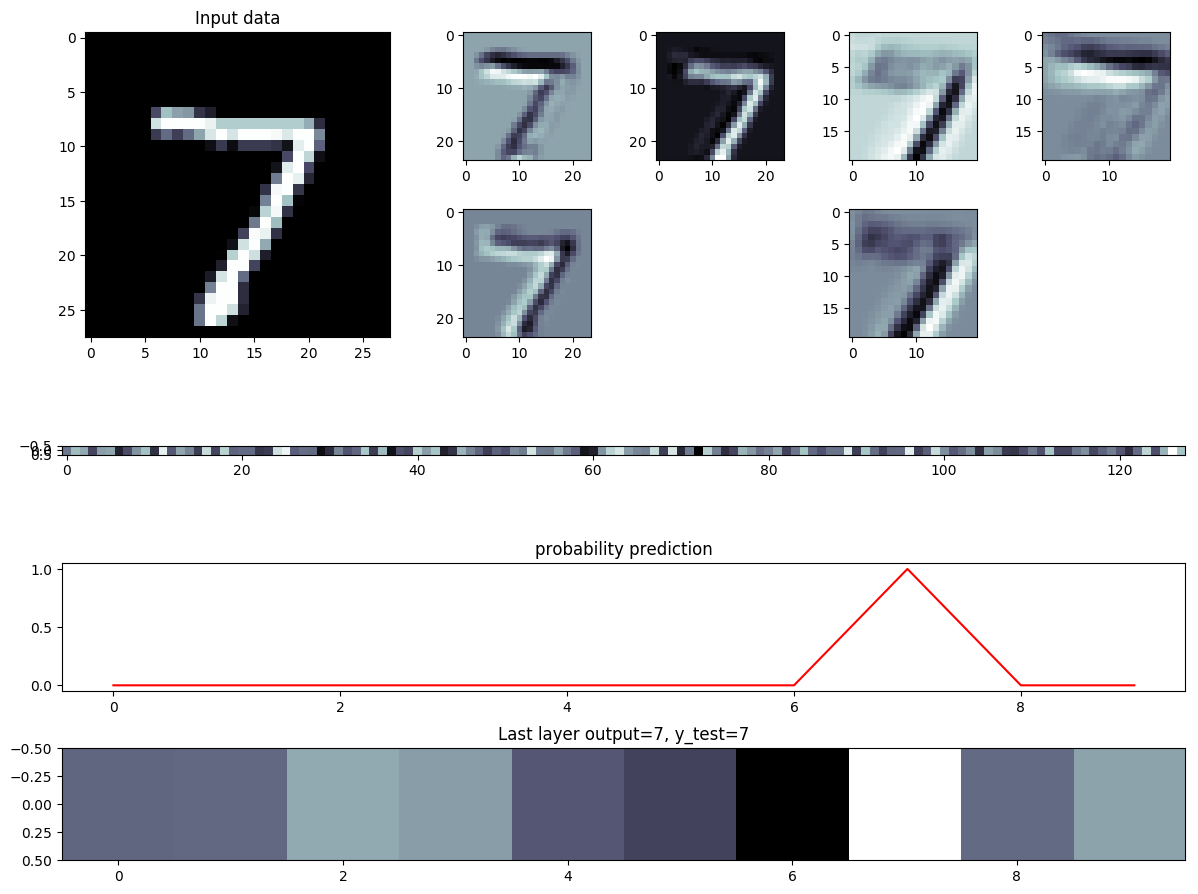

In [11]:
# Plot test data
plotvalue(0)

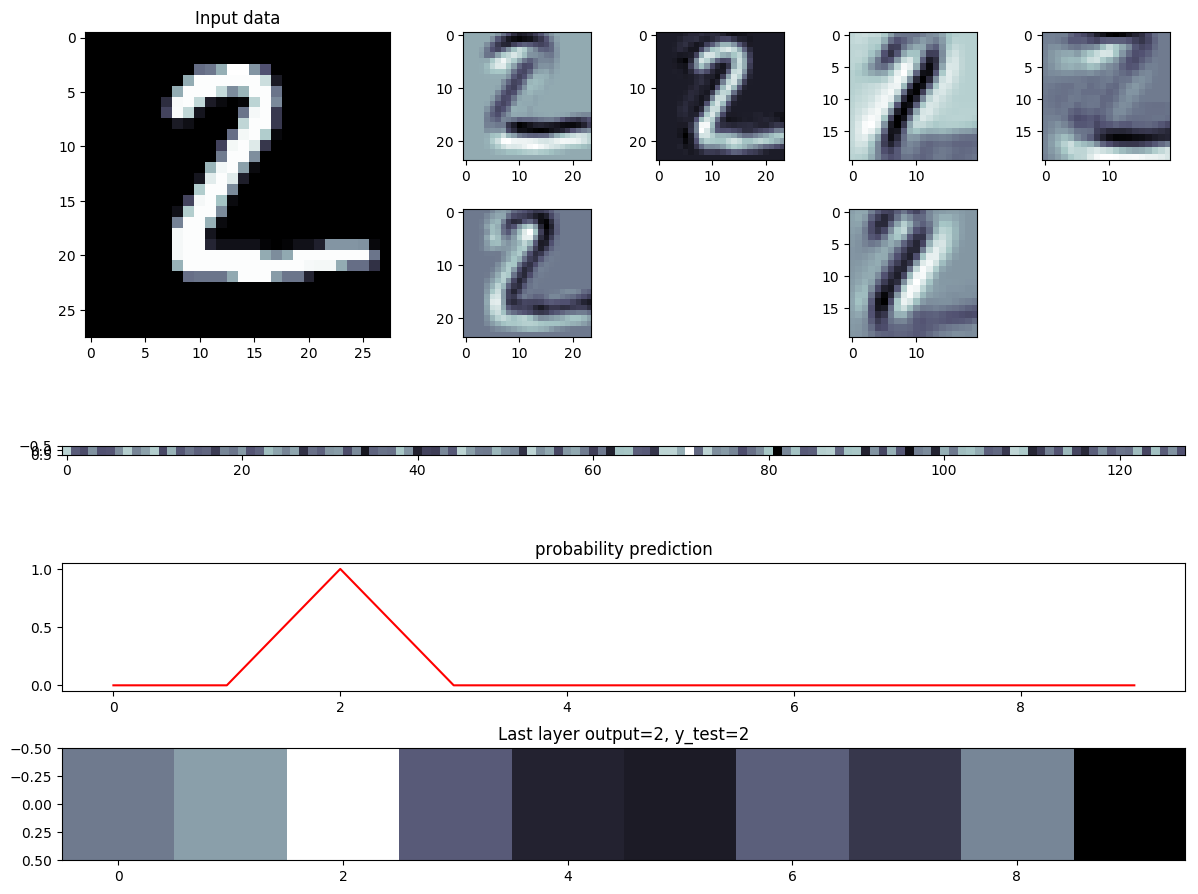

In [12]:
plotvalue(1)

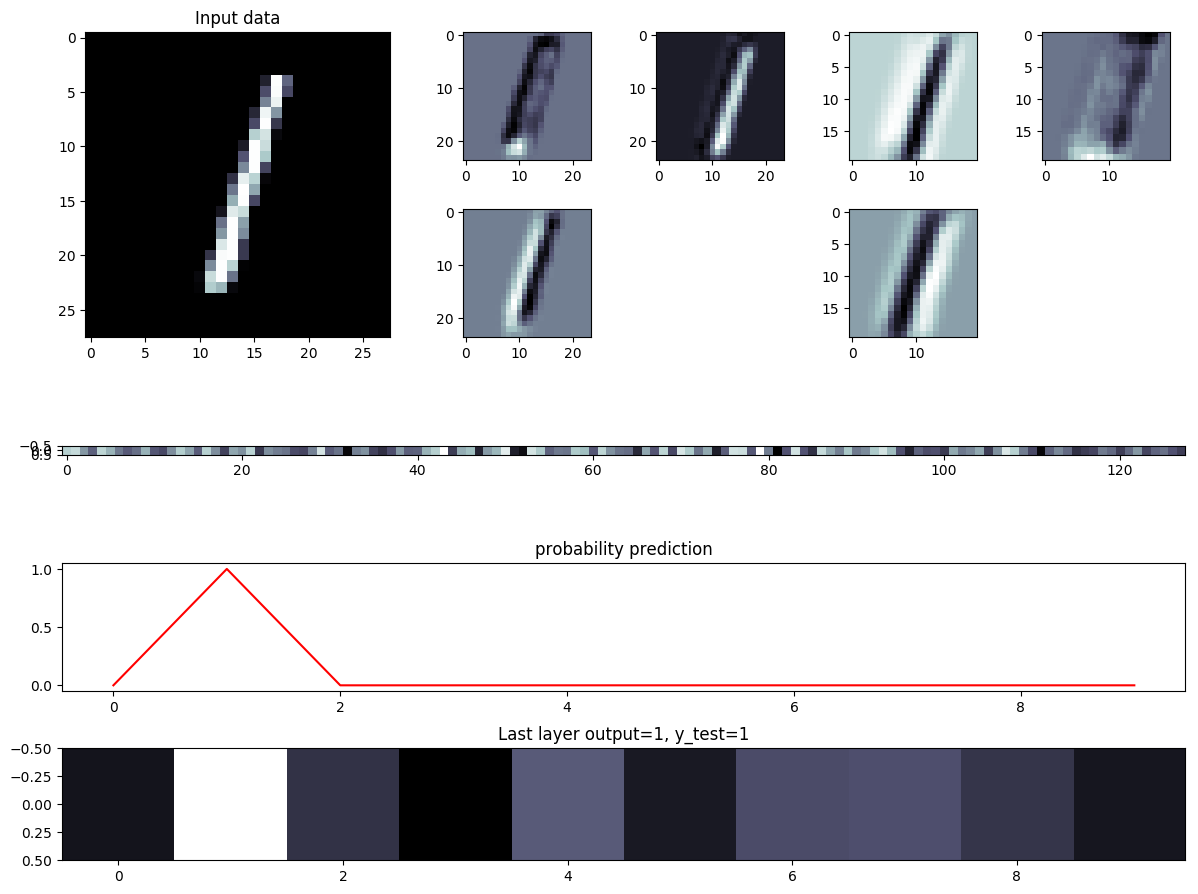

In [13]:
plotvalue(2)